## The Spark Foundation: GRIP

## Task 1: Prediction Using Supervised ML
> Predict the percentage of an student based on the no. of study hours

### Author: Aastha Gupta



In [ ]:
# Importing the libraries required
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading data from remote link
df = pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Check if there is any null value in the dataset
df.isnull().values.any()

False

No null values in the dataset, so we proceed by visualising the data.

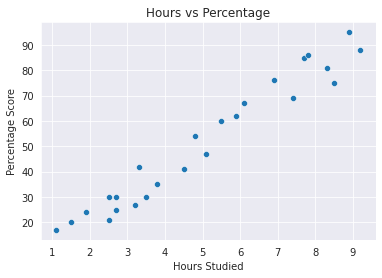

In [ ]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


**The above graph show a positive correlation between the number of hours studied and percentage of score.**

In [ ]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


**It is confirmed that Hours and Score are positively correlated**

## Preparing the data
Next, we divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
# Defining X and y from the data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [ ]:
# Spliting the Data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                             random_state=0) 

## Training the Model
After splitting the data into training and testing sets, we train our model

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Model Trained")

Model Trained


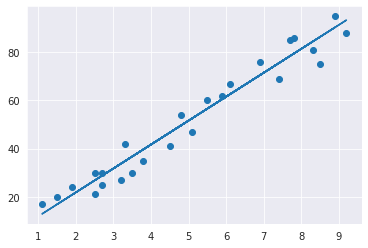

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores
predict = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [j for j in y_pred]})
predict

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [ ]:
# Comparing Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comparison

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Evaluating the Model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482


**Predicting the score if a student studies for 9.25 hrs/day**

In [ ]:
hours = [9.25]
own_pred = regressor.predict([hours])
print("Predicted Score = {}".format(own_pred[0]))
print("Round Up Value = {}".format(round(own_pred[0],2)))


Predicted Score = 93.89272889341652
Round Up Value = 93.89


**According to the linear regression model if a student studies for *9.25 hours* a day, they are likely to score *93.89 marks*.**